In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import squarify

from ucimlrepo import fetch_ucirepo 

import gudhi

from TopoMap import TopoMap
from TopoMapCut import TopoMapCutInv

np.random.seed(42)

2024-03-19 12:44:26.372146: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 12:44:26.407300: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 12:44:26.407329: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 12:44:26.408268: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 12:44:26.413399: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 12:44:26.413927: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
def get_colors(values, cmap=cm.YlGnBu):
    colors = []

    minima = min(values)
    maxima = max(values)

    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima)
    mapper = cm.ScalarMappable(norm=norm, cmap=cmap)

    for v in values:
        rgba = mapper.to_rgba(v)
        hex = matplotlib.colors.rgb2hex(rgba)
        colors.append(hex)

    return colors, mapper

In [3]:
def tree_map(components_size, components_persistence,
             cmap=cm.YlGnBu, ax=None, labels=None):

    if ax is None:
        ax = plt.subplot(111)

    colors_persistence, mapper = get_colors(components_persistence, cmap=cmap)
    squarify.plot(sizes = components_size,
                  label = labels,
                  color = colors_persistence,
                  edgecolor='#E6E6E6',
                  ax = ax)
    ax.axis("off")
    plt.colorbar(mapper, ax=ax)
    
    return ax

def plot_tree_map_max_comps(X, max_comps, ignore_ones_labels=False):
    components_persistences = []
    components_sizes = []

    fig, axs = plt.subplots(1, len(max_comps), figsize=(4*len(max_comps), 4))

    for i, c in enumerate(max_comps):
        topocut = TopoMapCutInv(X, 
                                max_components=c,
                                proj_method='pca')
        proj = topocut.run()

        components_persistences.append(topocut.components_persistence)    

        components_size = []
        for sub in topocut.subsets:
            components_size.append(len(sub))
        components_sizes.append(components_size)

        labels = []
        if ignore_ones_labels:
            labels=[str(size) if size > 1 else '' for size in components_size]
        else:
            labels=[str(size) for size in components_size]

        tree_map(components_size=components_size,
                components_persistence=components_persistences[-1],
                labels=labels,
                ax=axs[i])
        axs[i].set_title(f'Max components = {c}')

    fig.suptitle('TreeMaps with different max components')
    plt.tight_layout()
    
    return fig

## Iris

In [4]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

In [5]:
topocut_iris = TopoMapCutInv(X.to_numpy(), 
                            max_components=100,
                            proj_method='tsne')
proj_iris = topocut_iris.run()
print(f'Number of components: {len(topocut_iris.subsets)}')

[INFO] Max components hit. # components: 100 | Max_components: 100
Number of components: 100


In [6]:
components_size = []

for sub in topocut_iris.subsets:
    components_size.append(len(sub))

labels = [str(size) for size in components_size]

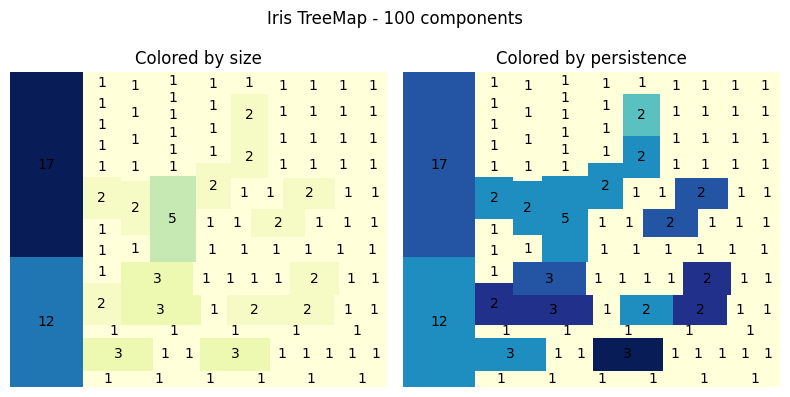

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

colors_size, m = get_colors(components_size)
squarify.plot(sizes = components_size,
              label = labels,
              color = colors_size,
              ax = axs[0])
axs[0].set_title('Colored by size')
axs[0].axis("off")

colors_persistence, m = get_colors(topocut_iris.components_persistence)
squarify.plot(sizes = components_size,
              label = labels,
              color = colors_persistence,
              ax = axs[1])
axs[1].set_title('Colored by persistence')
axs[1].axis("off")

fig.suptitle('Iris TreeMap - 100 components')
plt.tight_layout()
plt.show()

[INFO] Max components hit. # components: 25 | Max_components: 25
[INFO] Max components hit. # components: 50 | Max_components: 50
[INFO] Max components hit. # components: 100 | Max_components: 100


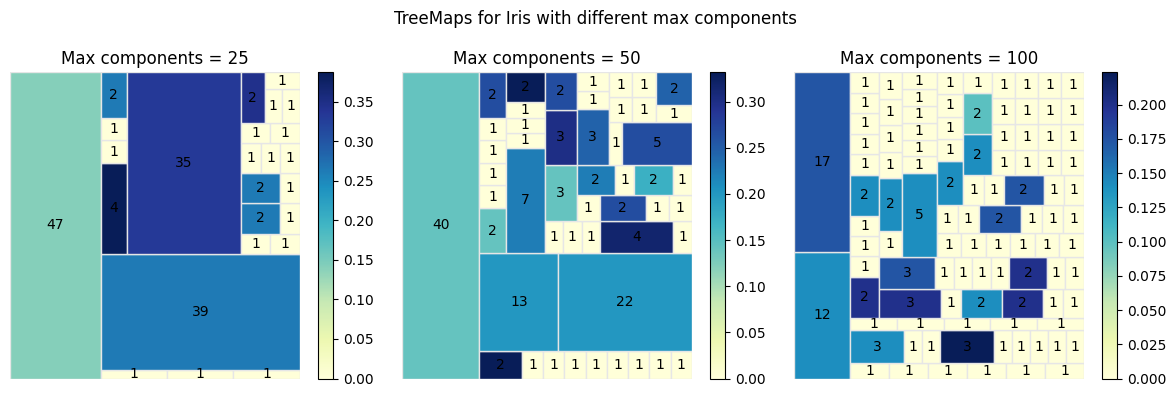

In [8]:
max_comps = [25, 50, 100]
fig = plot_tree_map_max_comps(X.to_numpy(), max_comps)
fig.suptitle('TreeMaps for Iris with different max components')
plt.show()

## Seeds

In [9]:
data_seeds = pd.read_csv('data/UCI/seeds/seeds_dataset.txt', sep='\t',
                         header=None,
                         names=['x1','x2','x3','x4','x5','x6','x7','class'])

X_seeds = data_seeds.copy().drop(['class'], axis=1)
y_seeds = data_seeds[['class']]

[INFO] Max components hit. # components: 25 | Max_components: 25
[INFO] Max components hit. # components: 50 | Max_components: 50
[INFO] Max components hit. # components: 100 | Max_components: 100


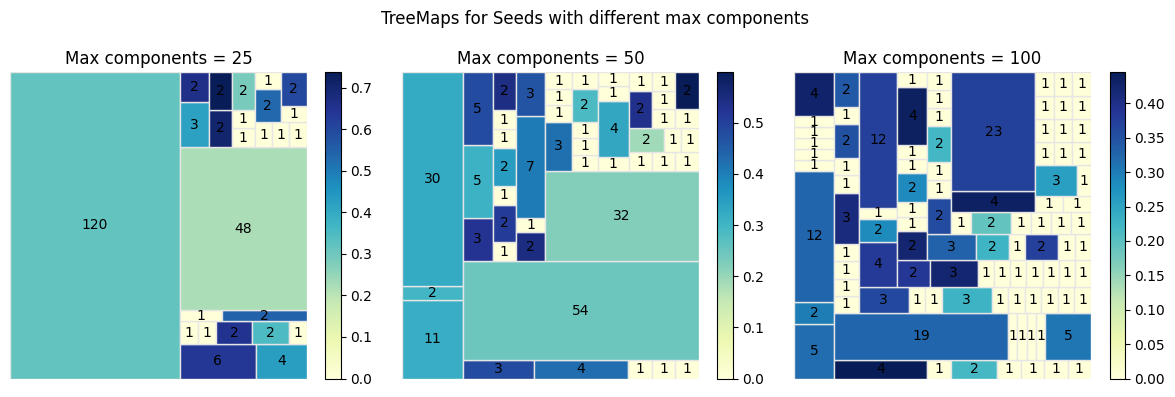

In [10]:
max_comps = [25, 50, 100]
fig = plot_tree_map_max_comps(X_seeds.to_numpy(), max_comps)
fig.suptitle('TreeMaps for Seeds with different max components')
plt.show()

## Cancer

In [11]:
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X_cancer = breast_cancer_wisconsin_original.data.features 
X_cancer = X_cancer[X_cancer.notna().all(axis=1)]

[INFO] Max components hit. # components: 100 | Max_components: 100
[INFO] Max components hit. # components: 200 | Max_components: 200
[INFO] Max components hit. # components: 300 | Max_components: 300


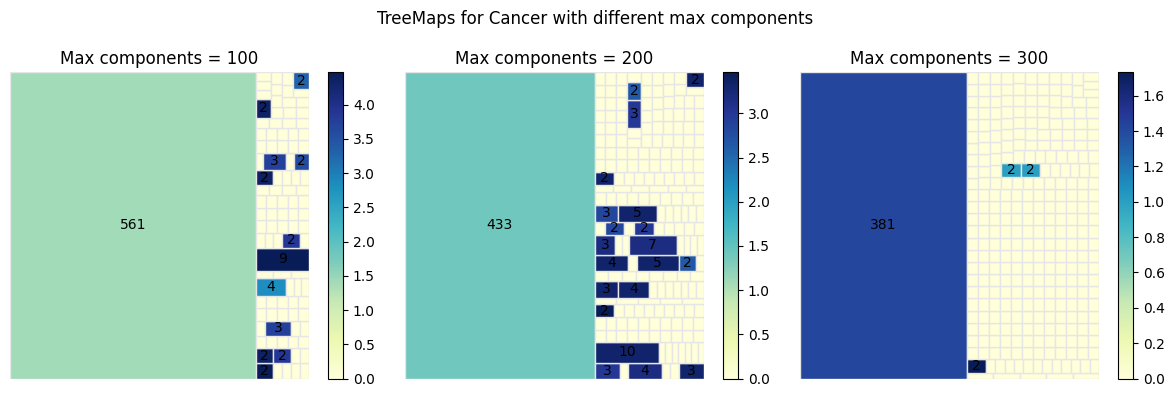

In [12]:
max_comps = [100,200,300]
fig = plot_tree_map_max_comps(X_cancer.to_numpy(), max_comps, ignore_ones_labels=True)
fig.suptitle('TreeMaps for Cancer with different max components')
plt.show()

## MFeat

In [13]:
data_mfeat = pd.read_csv('data/UCI/multiple+features/mfeat-kar', sep='\s+',
                         header=None,
                         names=['x'+str(i) for i in range(1,65)])
data_mfeat['class'] = 0
for i, row in data_mfeat.iterrows():
    data_mfeat.loc[i,'class'] = i//200

X_mfeat = data_mfeat.drop(['class'], axis=1)

[INFO] Max components hit. # components: 100 | Max_components: 100
[INFO] Max components hit. # components: 200 | Max_components: 200
[INFO] Max components hit. # components: 300 | Max_components: 300
[INFO] Max components hit. # components: 400 | Max_components: 400


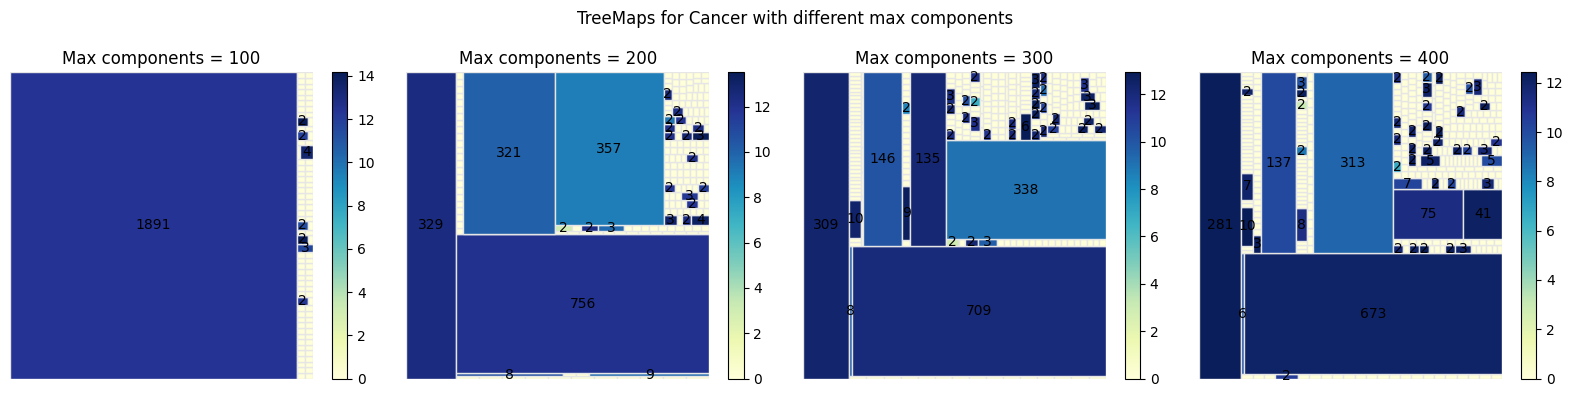

In [14]:
max_comps = [100, 200, 300, 400]
fig = plot_tree_map_max_comps(X_mfeat.to_numpy(), max_comps, ignore_ones_labels=True)
fig.suptitle('TreeMaps for Cancer with different max components')
plt.show()